Black Scholes Call Option Formula theoretical

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.
    
    Parameters:
    S : float : current stock price
    K : float : strike price
    T : float : time to maturity in years
    r : float : risk-free interest rate
    sigma : float : volatility of underlying asset
    
    Returns:
    float : call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [27]:
!pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 7.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [18]:
!pip install scipy



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


Black Scholes Put Option Formula theoretical

In [20]:
def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European put option.
    
    Parameters:
    S : float : current stock price
    K : float : strike price
    T : float : time to maturity in years
    r : float : risk-free interest rate
    sigma : float : volatility of underlying asset
    
    Returns:
    float : put option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


In [21]:
# Sample inputs
S = 100      # current stock price
K = 110      # strike price
T = 0.5      # 6 months = 0.5 years
r = 0.05     # 5% annual risk-free rate
sigma = 0.2  # 20% annual volatility

call_price = black_scholes_call(S, K, T, r, sigma)
print("Call Option Price:", round(call_price, 2))


Call Option Price: 2.91


In [22]:
put_price = black_scholes_put(S, K, T, r, sigma)
print("Put Option Price:", round(put_price, 2))


Put Option Price: 10.19


In [24]:
np.random.seed(42)
n = 5000

S = np.random.uniform(50, 150, n)
K = np.random.uniform(50, 150, n)
T = np.random.uniform(0.1, 2, n)
r = np.random.uniform(0.01, 0.05, n)
sigma = np.random.uniform(0.1, 0.5, n)

call_prices = [black_scholes_call(s, k, t, rate, vol) for s, k, t, rate, vol in zip(S, K, T, r, sigma)]
put_prices  = [black_scholes_put(s, k, t, rate, vol) for s, k, t, rate, vol in zip(S, K, T, r, sigma)]

df_call = pd.DataFrame({'S': S, 'K': K, 'T': T, 'r': r, 'sigma': sigma, 'Call_Price': call_prices})
df_put  = pd.DataFrame({'S': S, 'K': K, 'T': T, 'r': r, 'sigma': sigma, 'Put_Price': put_prices})



In [35]:
# For Call
X_call = df_call[['S', 'K', 'T', 'r', 'sigma']]
y_call = df_call['Call_Price']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_call, y_call, test_size=0.2)

rf_call = RandomForestRegressor()
rf_call.fit(Xc_train, yc_train)
call_preds = rf_call.predict(Xc_test)
print("R² for Call:", r2_score(yc_test, call_preds))

# For Put
X_put = df_put[['S', 'K', 'T', 'r', 'sigma']]
y_put = df_put['Put_Price']
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_put, y_put, test_size=0.2)

rf_put = RandomForestRegressor()
rf_put.fit(Xp_train, yp_train)
put_preds = rf_put.predict(Xp_test)
print("R² for Put:", r2_score(yp_test, put_preds))


R² for Call: 0.9946362137387452
R² for Put: 0.9936171053793409


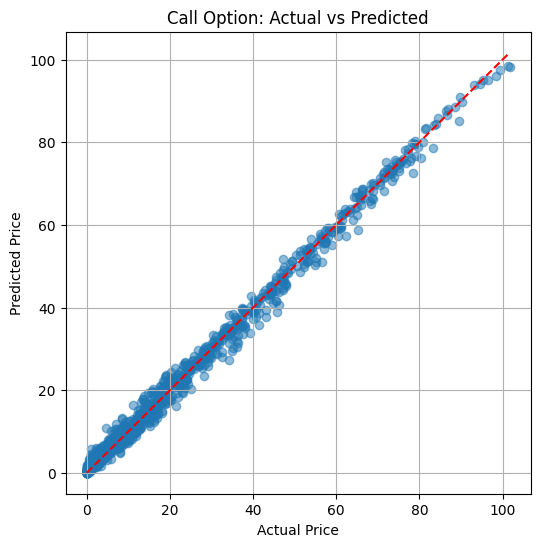

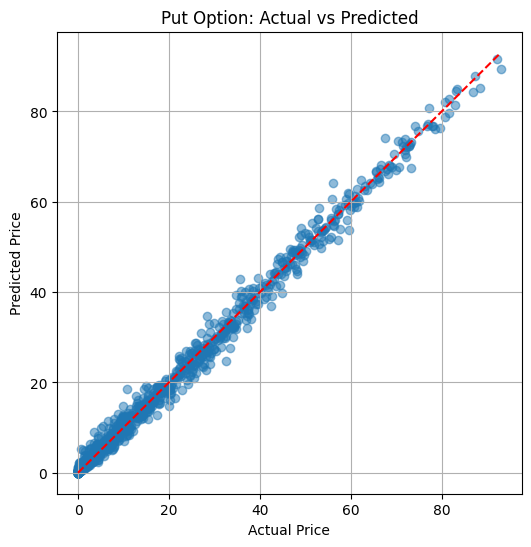

In [39]:
# Call
plt.figure(figsize=(6,6))
plt.scatter(yc_test, call_preds, alpha=0.5)
plt.plot([yc_test.min(), yc_test.max()], [yc_test.min(), yc_test.max()], 'r--')
plt.title("Call Option: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

# Put
plt.figure(figsize=(6,6))
plt.scatter(yp_test, put_preds, alpha=0.5)
plt.plot([yp_test.min(), yp_test.max()], [yp_test.min(), yp_test.max()], 'r--')
plt.title("Put Option: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()


In [40]:
pip install nsepython



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
!pip install nsepython yfinance pandas numpy scikit-learn matplotlib


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.1 MB/s eta 0:00:009.7 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=b53fc05d428ea1a8f42798b89dab962111d91044b6f0c615e61a1d9606add68d
  Stored in directory: /Users/sohamghosh/Library/Caches/pip/wheels/e9/25/85/25d2e1cfc0ece64b930b16972f7e4cc3599c43b531f1eba06d
  Created wheel for peewee: filename=peewee-3.18.2-cp310-cp310-macosx_15_0_arm64.whl size=285097 sha256=9697615e6aeefe11b06633f0abed9c5ac4964eae90bbd4c83abf20bad13067ba
  Stored in directory: /Users/sohamghosh/Library/Caches/pip/wheels/29/22/6c/745744e946d21fdbad

In [129]:
import pandas as pd

df = pd.read_csv("options_data_calls_puts.csv")

# Separate for call and put
df_call = df.copy()
df_put = df.copy()


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# For Call
X_call = df_call[['S', 'K', 'T', 'r', 'sigma']]
y_call = df_call['Call_Price']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_call, y_call, test_size=0.2, random_state=42)

rf_call = RandomForestRegressor(n_estimators=100, random_state=42)
rf_call.fit(Xc_train, yc_train)
call_preds = rf_call.predict(Xc_test)
print("R² for Call:", r2_score(yc_test, call_preds))

# For Put
X_put = df_put[['S', 'K', 'T', 'r', 'sigma']]
y_put = df_put['Put_Price']
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_put, y_put, test_size=0.2, random_state=42)

rf_put = RandomForestRegressor(n_estimators=100, random_state=42)
rf_put.fit(Xp_train, yp_train)
put_preds = rf_put.predict(Xp_test)
print("R² for Put:", r2_score(yp_test, put_preds))


R² for Call: 0.9728098060767751
R² for Put: 0.9749869621996354


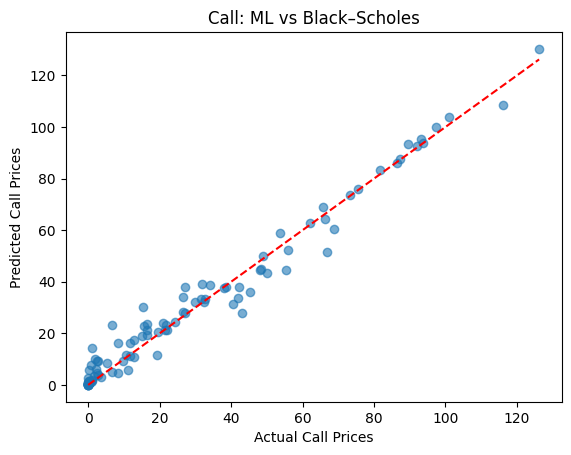

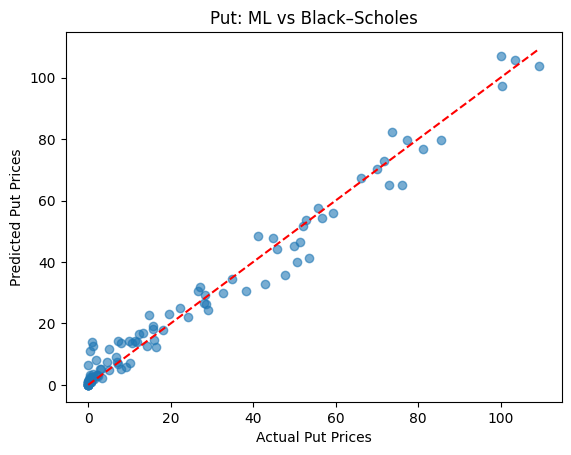

In [131]:
import matplotlib.pyplot as plt

# Call prices
plt.scatter(yc_test, call_preds, alpha=0.6)
plt.plot([yc_test.min(), yc_test.max()], [yc_test.min(), yc_test.max()], 'r--')
plt.xlabel("Actual Call Prices")
plt.ylabel("Predicted Call Prices")
plt.title("Call: ML vs Black–Scholes")
plt.show()

# Put prices
plt.scatter(yp_test, put_preds, alpha=0.6)
plt.plot([yp_test.min(), yp_test.max()], [yp_test.min(), yp_test.max()], 'r--')
plt.xlabel("Actual Put Prices")
plt.ylabel("Predicted Put Prices")
plt.title("Put: ML vs Black–Scholes")
plt.show()
